Use of ncra, a linux command, to compute average of Temperature: (running the command in background)

ncra -d deptht,0 -v thetao /storage/shared/oceanparcels/input_data/NEMO16_CMCC/ROMEO.01_1d_thetao_201*_grid_T.nc /storage/shared/oceanparcels/input_data/NEMO16_CMCC/ROMEO.01_1d_thetao_202[01]*_grid_T.nc data/mean_2010-2021_z0_thetao.nc &

ncra -d deptht,0 x,1500,1903 y,1000,1700 -v thetao /storage/shared/oceanparcels/input_data/NEMO16_CMCC/ROMEO.01_1d_thetao_201*_grid_T.nc data/mean_test_thetao.nc &


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean
import matplotlib.ticker as mticker
from matplotlib import colors,cm
import cartopy.mpl.ticker as cticker




In [2]:
# ds = xr.open_dataset('/storage/shared/oceanparcels/input_data/NEMO16_CMCC/ROMEO.01_1d_thetao_20130502_grid_T.nc')
dz0_temp = xr.open_dataset('/nethome/manra003/data/mean_2010-2021_z0_thetao.nc')
dz0_temp

<xarray.Dataset>
Dimensions:              (y: 3896, x: 1903, nvertex: 4, deptht: 1,
                          axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat              (y, x) float32 ...
    nav_lon              (y, x) float32 ...
  * deptht               (deptht) float32 0.3953
  * time_counter         (time_counter) datetime64[ns] 2016-01-01T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_lon           (y, x, nvertex) float32 ...
    bounds_lat           (y, x, nvertex) float32 ...
    deptht_bounds        (deptht, axis_nbounds) float32 ...
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    thetao               (time_counter, deptht, y, x) float32 ...
Attributes: (12/14)
    name:                         ROMEO.01_1d_20100101_20100131_thetao_grid_T3D
    description:                  Created by xios
    title:                        Created by xios
    Conventions:                  CF-1.6
    timeStamp:                    2020-Oct-18 08:46:09 GMT
    uuid:                         7550411a-0b27-41c8-93db-f805015d482f
    ...                           ...
    DOMAIN_type:                  box
    original_DOMAIN_size_global:  [5762 3963]
    comment:                      Global domain halo removed
    nemo_rebuild_version:         0.3.1-beta (31-03-2020)
    history:                      Sat May 18 14:55:29 2024: ncra -d deptht,0 ...
    NCO:                          netCDF Operators version 4.8.1 (Homepage = ...

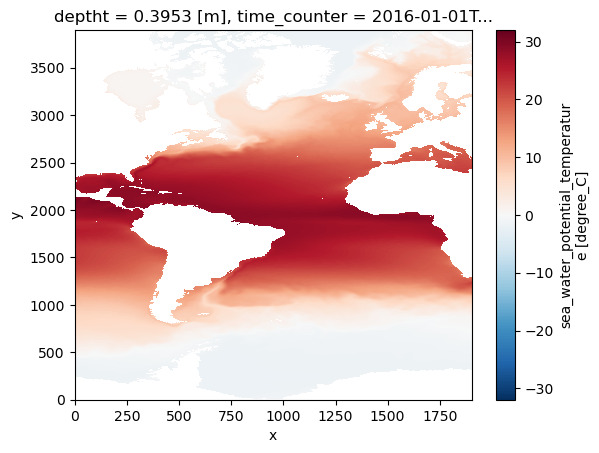

In [11]:
dz0_temp.thetao.plot()

In [3]:
# crop dataset-
min_lat, max_lat = -38, -10
min_lon, max_lon = 5, 21


temp_subset = dz0_temp.isel(y=slice(1000,1750), x=slice(1500,1903))
temp_subset

<xarray.Dataset>
Dimensions:              (y: 750, x: 403, nvertex: 4, deptht: 1,
                          axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat              (y, x) float32 ...
    nav_lon              (y, x) float32 ...
  * deptht               (deptht) float32 0.3953
  * time_counter         (time_counter) datetime64[ns] 2016-01-01T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_lon           (y, x, nvertex) float32 ...
    bounds_lat           (y, x, nvertex) float32 ...
    deptht_bounds        (deptht, axis_nbounds) float32 ...
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    thetao               (time_counter, deptht, y, x) float32 ...
Attributes: (12/14)
    name:                         ROMEO.01_1d_20100101_20100131_thetao_grid_T3D
    description:                  Created by xios
    title:                        Created by xios
    Conventions:                  CF-1.6
    timeStamp:                    2020-Oct-18 08:46:09 GMT
    uuid:                         7550411a-0b27-41c8-93db-f805015d482f
    ...                           ...
    DOMAIN_type:                  box
    original_DOMAIN_size_global:  [5762 3963]
    comment:                      Global domain halo removed
    nemo_rebuild_version:         0.3.1-beta (31-03-2020)
    history:                      Sat May 18 14:55:29 2024: ncra -d deptht,0 ...
    NCO:                          netCDF Operators version 4.8.1 (Homepage = ...

4.3389874 26.83636


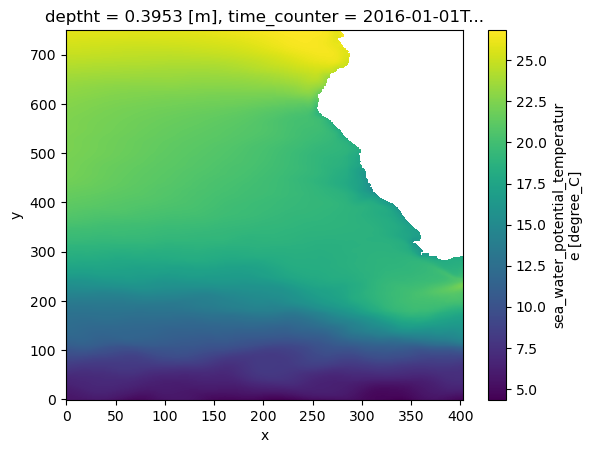

In [42]:
print(np.nanmin(temp_subset.thetao), np.nanmax(temp_subset.thetao))
temp_subset.thetao.plot()

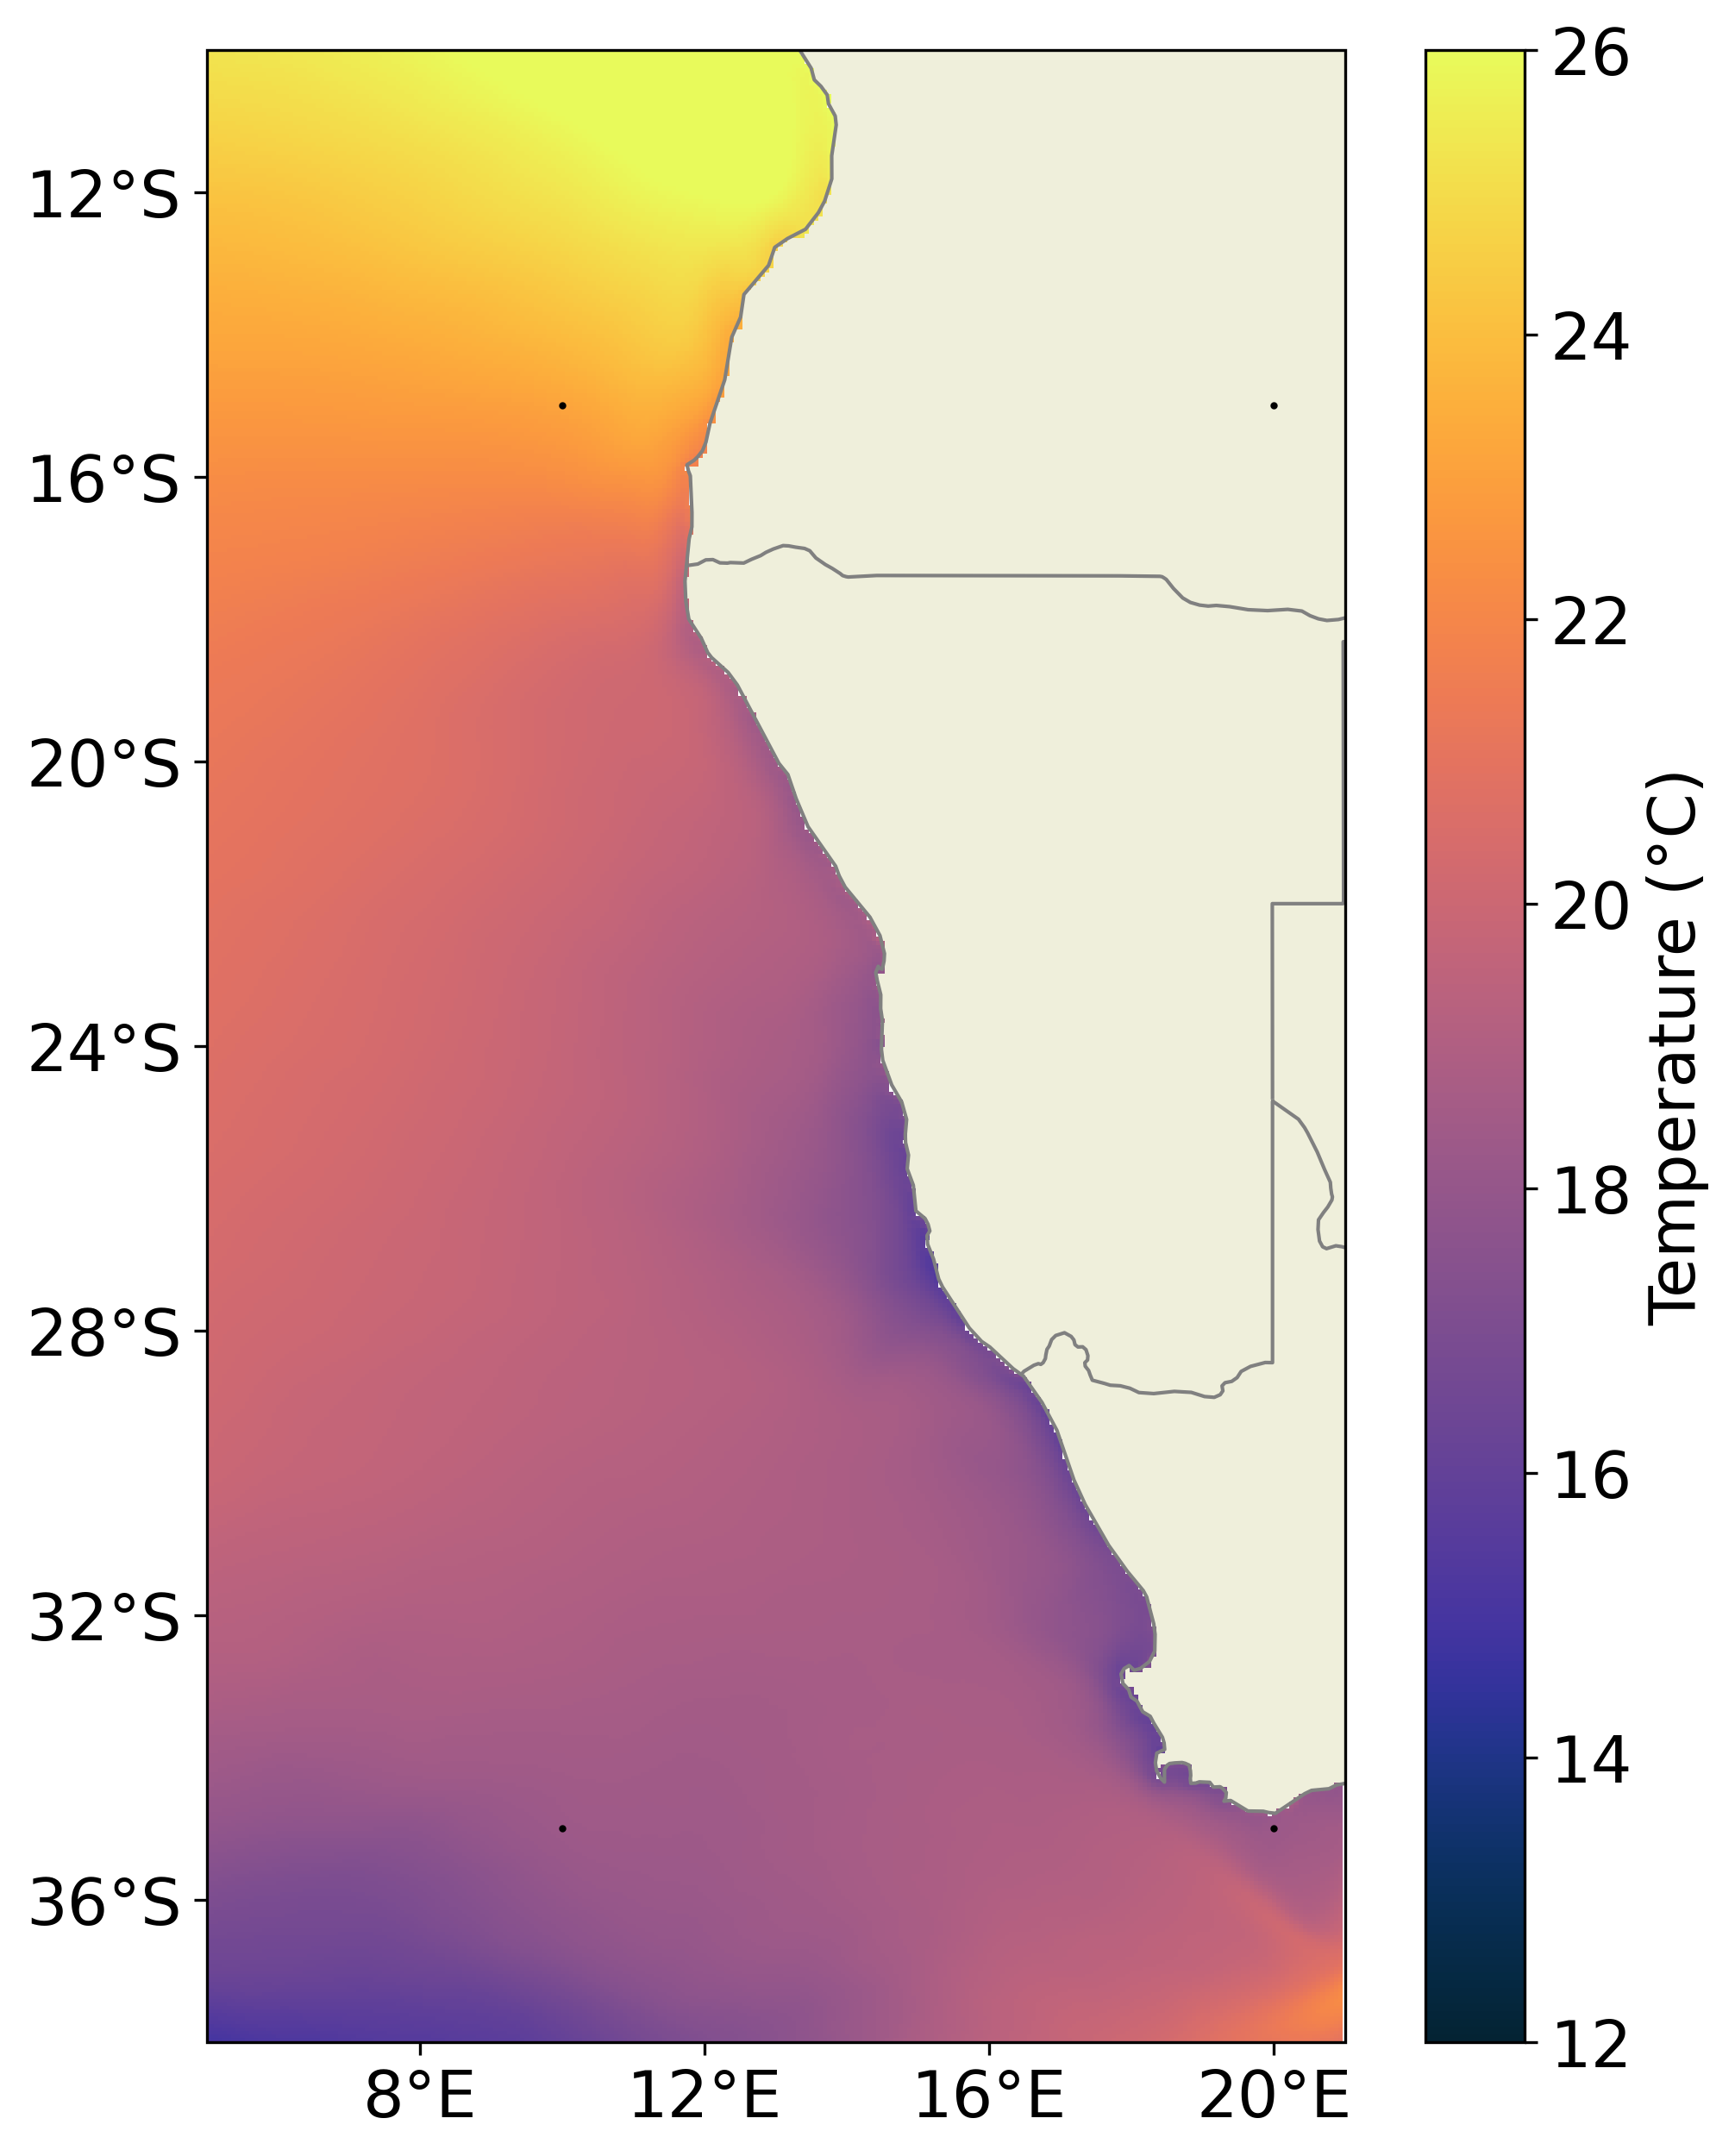

In [8]:
custom_size = 18
ticks_size=18

plt.figure(figsize=(8, 10),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
x_ticks=np.arange(0,24,4)
y_ticks=np.arange(-40,-10,4)
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.xlocator = mticker.FixedLocator(x_ticks)
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
gl.ylines = False
gl.ylocator = mticker.FixedLocator(y_ticks)
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': ticks_size, 'color': 'k'}
gl.ylabel_style = {'size': ticks_size, 'color': 'k'}
colormap = colors.ListedColormap(['gainsboro', 'white'])
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
# ax.yaxis.set_tick_params(labelleft=True)
ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
# ax.xaxis.set_tick_params(labelbottom=True)
ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())


plt.tick_params(axis='both', which='major', labelsize=custom_size)
plt.pcolormesh(temp_subset.nav_lon, temp_subset.nav_lat, temp_subset.thetao[0,0,1:,1:], cmap=cmocean.cm.thermal, vmin=12, vmax=26)

ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')

ax.add_feature(cfeature.LAND)

cbar=plt.colorbar()
cbar.set_label('Temperature (°C)',fontsize=custom_size)
cbar.ax.tick_params(labelsize=custom_size)

plt.scatter(10,-35, s=1, color='k')
plt.scatter(10,-15, s=1, color='k')
plt.scatter(20,-15, s=1, color='k')
plt.scatter(20,-35, s=1, color='k')


plt.savefig('CMCC_MeanTemperature_2010_2021_z0.jpeg',bbox_inches='tight',
            pad_inches=0.2)